<a href="https://colab.research.google.com/github/tbass134/Training-Models-on-Imbalanced-Text-Data---Liveproject/blob/master/Training_Models_on_Imbalanced_Text_Data_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data("/content/data")

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
X_train[0][:50], y_train[0]

([1,
  14,
  22,
  16,
  43,
  530,
  973,
  1622,
  1385,
  65,
  458,
  4468,
  66,
  3941,
  4,
  173,
  36,
  256,
  5,
  25,
  100,
  43,
  838,
  112,
  50,
  670,
  22665,
  9,
  35,
  480,
  284,
  5,
  150,
  4,
  172,
  112,
  167,
  21631,
  336,
  385,
  39,
  4,
  172,
  4536,
  1111,
  17,
  546,
  38,
  13,
  447],
 1)

In [ ]:
idx = tf.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
INDEX_FROM = 3
word_to_id = tf.keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
def itos(review):
  id_to_word = {value:key for key,value in word_to_id.items()}
  return (' '.join(id_to_word[id] for id in review ))
 

In [ ]:
import numpy as np

pos_reviews = X_train[np.where(y_train == 1)]
neg_reviews = X_train[np.where(y_train == 0)]
# pos_reviews, neg_reviews
itos(pos_reviews[0]), itos(neg_reviews[0]),

("<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and s

In [ ]:
pos_reviews_word_count = sum([len(sent) for sent in pos_reviews])
neg_reviews_word_count = sum([len(sent) for sent in neg_reviews])
pos_reviews_word_count, neg_reviews_word_count

(3019537, 2948304)

In [ ]:
pos_reviews_ct = []
for sent in pos_reviews:
    pos_reviews_ct.append(len(sent))

neg_reviews_ct = []
for sent in neg_reviews:
    neg_reviews_ct.append(len(sent))

In [ ]:
neg_reviews_ct

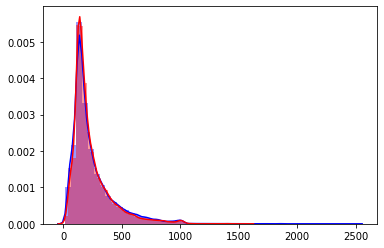

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.distplot(pos_reviews_ct, color="blue",  label="Word count of positive reviews")
sns.distplot(neg_reviews_ct, color="red", label="Word count of negitive reviews")

# 1.2

In [ ]:
!pip install nlpia

     |████████████████████████████████| 32.0MB 86kB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 716kB 48.2MB/s 
  Created wheel for pypandoc: filename=pypandoc-1.5-cp36-none-any.whl size=17037 sha256=ca5470b8f1c00e636335d7f36e25db0f381c28fa0bbb0aa93d228a5c4a688281
  Stored in directory: /root/.cache/pip/wheels/bb/7d/d6/2f9af55e800d37e42e546106bcbd36a86e24e725e303d17e04
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144791 sha256=40d331ef54001585ea32517c16d57cadc9f0ffc356201e51162f66734a473b25
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built pypandoc python-Levenshtein


In [ ]:
import glob
import os
from random import shuffle
from nltk.tokenize import TreebankWordTokenizer
from nlpia.loaders import get_data
word_vectors = get_data('wv')

/usr/local/lib/python3.6/dist-packages/pugnlp/constants.py:158: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  MIN_TIMESTAMP = pd.Timestamp(pd.datetime(1677, 9, 22, 0, 12, 44), tz='utc')
100%|██████████| 402111/402111 [01:35<00:00, 4192.19it/s]

2020-07-03 15:29:01,846 WARNING:  nlpia.loaders:528:normalize_ext_rename normalize_ext.filepath=/usr/local/lib/python3.6/dist-packages/nlpia/bigdata/googlenews-vectors-negative300.bin.gz


KeyboardInterrupt: ignored

In [ ]:
def pre_process_data(filepath):
  """
    Load pos and neg examples from separate dirs then shuffle them
    together.
  """
  positive_path = os.path.join(filepath, 'pos')
  negative_path = os.path.join(filepath, 'neg')
  pos_label = 1
  neg_label = 0
  dataset = []
  for filename in glob.glob(os.path.join(positive_path, '*.txt')):
    with open(filename, 'r') as f:
      dataset.append((pos_label, f.read()))
      for filename in glob.glob(os.path.join(negative_path, '*.txt')):
        with open(filename, 'r') as f:
        dataset.append((neg_label, f.read()))
  shuffle(dataset)
  return dataset

In [ ]:
def tokenize_and_vectorize(dataset):
  tokenizer = TreebankWordTokenizer()
  vectorized_data = []
  for sample in dataset:
    tokens = tokenizer.tokenize(sample[1])
    sample_vecs = []
    for token in tokens:
      try:
        sample_vecs.append(word_vectors[token])
        except KeyError:
          pass
      vectorized_data.append(sample_vecs)
  return vectorized_data



In [ ]:
def collect_expected(dataset):
  """ Peel off the target values from the dataset """
  expected = []
  for sample in dataset:
    expected.append(sample[0])
  return expected

In [ ]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

In [ ]:
dataset = pre_process_data('./aclimdb/train')
vectorized_data = tokenize_and_vectorize(dataset)
expected = collect_expected(dataset)
split_point = int(len(vectorized_data) * .8)
x_train = vectorized_data[:split_point]
y_train = expected[:split_point]
x_test = vectorized_data[split_point:]
y_test = expected[split_point:]

